# Baseline Classification Model: Random Forest w/ Feature Engineering

This file is composed of a random forest classification model to evaluate a general accuracy level of traditional ML methods in classifying our HAR data based on activity. We also used Leave-One-Out Cross-Validation to validate our models. 

__INPUT: .csv files containing the sliding window summary statistics data with feature engineering (engineered_features.csv)__

__OUTPUT: Random Forest Multi-Classification Model__

## Imports

In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

## Read in Data

In [238]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../../10_code/40_usable_data_for_models/41_Duke_Data/engineered_features.csv')

In [239]:
df.head()

,ACC1,ACC2,ACC3,TEMP,EDA,BVP,HR,Magnitude,Subject_ID,Activity,Round,ACC1_mean,ACC2_mean,ACC3_mean,TEMP_mean,EDA_mean,BVP_mean,HR_mean,Magnitude_mean,ACC1_std,ACC2_std,ACC3_std,TEMP_std,EDA_std,BVP_std,HR_std,Magnitude_std,ACC1_skew,ACC2_skew,ACC3_skew,TEMP_skew,EDA_skew,BVP_skew,HR_skew,Magnitude_skew,ACC1_min,ACC2_min,ACC3_min,TEMP_min,EDA_min,BVP_min,HR_min,Magnitude_min,ACC1_max,ACC2_max,ACC3_max,TEMP_max,EDA_max,BVP_max,HR_max,Magnitude_max
0,[41.0 41.0 41.0 41.0 41.0 41.0 41.0 41.0 41.0 ...,[27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.0 ...,[40.0 40.0 40.0 40.0 40.0 40.0 40.0 40.0 40.0 ...,[32.39 32.39 32.39 32.39 32.34 32.34 32.34 32....,[0.275354 0.276634 0.270231 0.270231 0.26895 0...,[15.25 -12.75 -42.99 18.39 13.61 -9.66 -35.47 ...,[78.98 78.83500000000002 78.69 78.545 78.4 78....,[63.410093833710725 63.453053512025726 63.4961...,19-001,Baseline,1,40.248370,28.012880,38.824457,32.350,0.262354,-0.109875,73.931187,62.553853,0.701573,0.687590,0.632616,0.017607,0.004877,18.439453,2.574676,0.609756,-0.082592,-0.558848,0.705668,0.714533,0.896382,-0.392823,0.296262,0.531557,39.0,26.456522,38.0,32.33,0.254862,-42.99,69.7650,61.692787,41.543478,29.0,40.0,32.39,0.276634,34.83,78.98,63.757353
1,[39.0 39.06521739130435 39.130434782608695 39....,[29.0 28.93478260869565 28.869565217391305 28....,[38.0 38.02173913043478 38.04347826086956 38.0...,[32.34 32.34 32.34 32.34 32.33 32.33 32.33 32....,[0.25998499999999997 0.25998499999999997 0.258...,[-18.83 -0.3 11.03 6.09 -15.3 14.61 6.75 -2.38...,[73.52 73.435 73.35 73.265 73.18 73.0925 73.00...,[61.69278726074872 61.7168170027034 61.7409828...,19-001,Baseline,1,40.820000,26.815000,38.192500,32.339,0.261058,0.321375,69.481750,62.021872,1.192214,1.149559,0.529382,0.012610,0.003007,20.104717,2.608254,0.542348,0.515544,0.109446,-0.188071,0.787066,0.212943,-0.322900,-0.170923,-0.438037,39.0,24.600000,37.2,32.31,0.254862,-48.52,64.8025,60.778286,43.800000,29.0,39.0,32.37,0.266389,37.72,73.52,62.936476
2,[41.60869565217392 41.67391304347826 41.739130...,[26.39130434782609 26.32608695652174 26.260869...,[38.869565217391305 38.89130434782609 38.91304...,[32.34 32.34 32.34 32.34 32.33 32.33 32.33 32....,[0.265108 0.263827 0.266389 0.265108 0.266389 ...,[-27.69 30.51 14.64 1.97 -13.65 -48.52 17.77 2...,[69.63 69.515 69.4 69.285 69.17 69.04 68.91 68...,[62.758486272725364 62.78782873035957 62.81730...,19-001,Baseline,1,43.252235,25.312684,37.488043,32.337,0.259585,0.684000,64.893188,62.621785,2.109896,0.815025,0.647914,0.010536,0.004337,23.756276,2.639037,0.942868,-0.473020,0.227966,1.329886,0.620801,0.072564,-0.274279,0.185657,-0.382833,39.0,24.000000,37.0,32.31,0.252301,-48.52,60.9950,60.778286,45.532258,27.0,39.0,32.37,0.266389,47.14,69.63,64.010791
3,[43.971428571428575 44.14285714285715 44.31428...,[24.514285714285712 24.42857142857143 24.34285...,[37.17142857142857 37.142857142857146 37.11428...,[32.33 32.33 32.33 32.33 32.34 32.34 32.34 32....,[0.258704 0.258704 0.258704 0.257424 0.257424 ...,[17.18 2.41 -22.11 5.12 18.43 5.34 -14.33 -22....,[64.68 64.555 64.43 64.305 64.18 64.0475 63.91...,[62.579164557660036 62.649331804179724 62.7200...,19-001,Baseline,1,44.905798,24.915984,37.638218,32.356,0.254510,-0.180875,61.157687,63.734171,1.832017,1.509593,1.773398,0.025377,0.002396,25.635645,1.674001,0.841361,-4.941414,-1.040349,3.435987,0.672586,0.734482,-0.828441,0.406263,-0.532117,32.0,20.985816,37.0,32.33,0.251020,-101.74,58.8025,61.392182,46.000000,27.0,48.0,32.41,0.262546,47.14,64.68,65.711491
4,[45.54838709677418 45.564516129032256 45.58064...,[25.64516129032258 25.69354838709677 25.741935...,[37.0 37.0 37.0 37.0 37.0 37.0 37.0 37.0 37.0 ...,[32.34 32.34 32.34 32.34 32.33 32.33 32.33 32....,[0.253581 0.253581 0.253581 0.252301 0.252301 ...,[-32.0 15.14 24.41 3.88 -22.97 -0.34 17.89 3.0...,[60.92 60.8475 60.77500000000001 60.7025 60.63...,[64.04162603123257 64.07248675362091 64.103373...,19-001,Baseline,1,43.577055,22.974382,38.971144,32.389,0.252733,-0.209750,59.226438,62.913435,2.115371,2

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572 entries, 0 to 6571
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ACC1            6572 non-null   object 
 1   ACC2            6572 non-null   object 
 2   ACC3            6572 non-null   object 
 3   TEMP            6572 non-null   object 
 4   EDA             6572 non-null   object 
 5   BVP             6572 non-null   object 
 6   HR              6572 non-null   object 
 7   Magnitude       6572 non-null   object 
 8   Subject_ID      6572 non-null   object 
 9   Activity        6572 non-null   object 
 10  Round           6572 non-null   int64  
 11  ACC1_mean       6572 non-null   float64
 12  ACC2_mean       6572 non-null   float64
 13  ACC3_mean       6572 non-null   float64
 14  TEMP_mean       6572 non-null   float64
 15  EDA_mean        6572 non-null   float64
 16  BVP_mean        6572 non-null   float64
 17  HR_mean         6572 non-null   f

In [241]:
df.describe()

,Round,ACC1_mean,ACC2_mean,ACC3_mean,TEMP_mean,EDA_mean,BVP_mean,HR_mean,Magnitude_mean,ACC1_std,ACC2_std,ACC3_std,TEMP_std,EDA_std,BVP_std,HR_std,Magnitude_std,ACC1_skew,ACC2_skew,ACC3_skew,TEMP_skew,EDA_skew,BVP_skew,HR_skew,Magnitude_skew,ACC1_min,ACC2_min,ACC3_min,TEMP_min,EDA_min,BVP_min,HR_min,Magnitude_min,ACC1_max,ACC2_max,ACC3_max,TEMP_max,EDA_max,BVP_max,HR_max,Magnitude_max
count,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6.510000e+03,6.524000e+03,6.536000e+03,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000,6572.000000
mean,1.481132,6.869465,8.703668,24.576161,33.168642,4.175449,0.016950,86.537271,67.695828,7.910041,9.250891,8.092527,0.022281,0.162469,52.438431,1.094109,6.746436,-7.559377e-03,-4.125348e-02,-1.577413e-01,-0.026331,0.387768,-0.198833,-0.002717,0.103735,-12.403306,-11.704735,4.274566,33.129308,3.889613,-170.549361,84.713631,52.357189,26.285514,28.502354,41.777408,33.206433,4.515464,154.383570,88.365180,84.847394
std,0.499682,38.834313,38.335837,24.205938,1.265012,8.013829,2.841132,15.314664,8.342834,7.429935,10.520711,8.270658,0.020312,0.246096,52.095039,1.043740,6.334428,1.098937e+00,1.111494e+00,1.099679e+00,0.609450,0.925768,0.874834,0.626845,1.031014,44.598008,41.702483,35.761606,1.265297,7.723457,182.138130,15.117284,13.943277,43.867600,42.722398,27.108530,1.266619,8.305574,165.211018,15.533108,22.438202
min,1.000000,-110.628571,-85.509303,-76.556164,29.357000,0.006148,-20.568750,48.924188,37.192921,0.000000,0.000000,0.000000,0.003000,0.000891,0.498170,0.011421,0.001474,-8.775686e+00,-7.254128e+00,-8.268405e+00,-3.172502,-5.193445,-5.233724,-2.787084,-7.763299,-128.000000,-128.000000,-128.000000,26.650000,0.000000,-1722.290000,48.200000,6.403124,-100.310204,-83.648276,-62.604478,29.570000,0.010246,1.140000,50.020000,41.556393
25%,1.000000,-29.366843,-11.555704,7.589617,32.290750,0.224809,-0.812031,75.829547,62.909324,1.496717,1.037852,1.447853,0.013266,0.008665,19.666916,0.349137,1.090672,-4.068692e-01,-4.417558e-01,-5.814530e-01,-0.367745,-0.088061,-0.562751,-0.373594,-0.286297,-48.000000,-35.000000,-18.000000,32.250000,0.189546,-217.767500,74.295000,43.260836,-8.000000,-1.282710,25.641538,32.330000,0.259985,48.340000,77.423750,67.028637
50%,1.000000,17.756734,6.364547,24.028125,33.369750,1.485549,0.018312,85.185094,65.745502,6.040973,5.171681,5.612040,0.017059,0.070568,35.979836,0.759199,4.902906,-7.881091e-17,-5.964845e-16,-1.905950e-14,-0.011149,0.343242,-0.213405,0.002028,0.040909,-6.000000,-6.000000,1.317387,33.330000,1.236324,-108.095000,83.400000,54.281673,34.000000,18.972243,45.202375,33.410000,1.708956,102.610000,87.230000,78.654307
75%,2.000000,38.437095,31.657924,45.060584,34.137000,4.511118,0.812563,96.834453,71.040676,12.401048,13.876920,11.891025,0.024833,0.226159,65.564535,1.519270,11.298844,4.218040e-01,3.457590e-01,2.268180e-01,0.318422,0.884710,0.190516,0.360047,0.462464,21.881962,16.000000,35.053565,34.110000,4.139333,-52.810000,94.973125,61.822980,59.482843,61.000000,60.000000,34.160000,4.971825,194.780000,98.538125,98.228051
max,2.000000,110.254118,98.046121,92.769737,36.416000,76.624004,32.770500,162.717625,139.950335,58.736502,63.201619,62.778391,0.770462,3.281518,436.013759,10.226556,38.242312,8.775686e+00,8.775686e+00,8.775686e+00,3.181184,8.706911,5.419461,2.735236,8.774836,106.164706,92.000000,76.035897,36.390000,75.600563,-1.090000,161.530000,135.775088,127.000000,127.000000,127.000000,36.430000,77.247574,1836.170000,163.220000,214.946505


## Initial RF Model

In [242]:
np.random.seed(29)
rands = np.random.choice(df.Subject_ID.unique(),11, replace=False)
print(rands)

['19-041' '19-018' '19-047' '19-010' '19-054' '19-008' '19-026' '19-040'
 '19-011' '19-038' '19-007']


### Split Subjects into Test and Train Sets (n=44,11)

In [243]:
test = df[df['Subject_ID'].isin(rands)] 
train = df[-df['Subject_ID'].isin(rands)]

## Feature Selection

### Run this for Both Accelerometry and Physiological Data

In [244]:

train = train[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 
        'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std','Activity']]
test = test[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 
        'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std', 'Activity']]


### Run this for Only Accelerometer Data

In [245]:
"""
train = train[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std','Magnitude_std','Activity']]
test = test[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std','Magnitude_std','Activity']]
"""

"\ntrain = train[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std','Magnitude_std','Activity']]\ntest = test[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std','Magnitude_std','Activity']]\n"

### Run this for only Physiological Data

In [246]:
"""
train = train[['TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Activity']]
test = test[['TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Activity']] 
"""

"\ntrain = train[['TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 'TEMP_std',\n       'EDA_std', 'BVP_std', 'HR_std', 'Activity']]\ntest = test[['TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 'TEMP_std',\n       'EDA_std', 'BVP_std', 'HR_std', 'Activity']] \n"

### Run for Feature Importances

In [247]:
"""
train = train[['ACC1_mean', 'ACC2_mean',
       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean',
       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std', 'ACC1_skew',
       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',
       'HR_skew', 'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',
       'TEMP_min', 'EDA_min', 'BVP_min', 'HR_min', 'Magnitude_min', 'ACC1_max',
       'ACC2_max', 'ACC3_max', 'TEMP_max', 'EDA_max', 'BVP_max', 'HR_max',
       'Magnitude_max','Activity']]
test =test[['ACC1_mean', 'ACC2_mean',
       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean',
       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std', 'ACC1_skew',
       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',
       'HR_skew', 'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',
       'TEMP_min', 'EDA_min', 'BVP_min', 'HR_min', 'Magnitude_min', 'ACC1_max',
       'ACC2_max', 'ACC3_max', 'TEMP_max', 'EDA_max', 'BVP_max', 'HR_max',
       'Magnitude_max','Activity']]
"""

"\ntrain = train[['ACC1_mean', 'ACC2_mean',\n       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean',\n       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',\n       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std', 'ACC1_skew',\n       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',\n       'HR_skew', 'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',\n       'TEMP_min', 'EDA_min', 'BVP_min', 'HR_min', 'Magnitude_min', 'ACC1_max',\n       'ACC2_max', 'ACC3_max', 'TEMP_max', 'EDA_max', 'BVP_max', 'HR_max',\n       'Magnitude_max','Activity']]\ntest =test[['ACC1_mean', 'ACC2_mean',\n       'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean',\n       'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',\n       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std', 'ACC1_skew',\n       'ACC2_skew', 'ACC3_skew', 'TEMP_skew', 'EDA_skew', 'BVP_skew',\n       'HR_skew', 'Magnitude_skew', 'ACC1_min', 'ACC2_min', 'ACC3_min',\n       '

## Drop NA Values

In [248]:
# given the null values present, we must get rid of them (remember earlier function from module 1)

def assess_NA(data):
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)

    #concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    return df_NA
print('Before Dropping any Rows:')
assess = assess_NA(train)
assess

Before Dropping any Rows:


,Number of NA,Percent NA
Activity,0,0.0
Magnitude_mean,0,0.0
ACC2_mean,0,0.0
ACC3_mean,0,0.0
TEMP_mean,0,0.0
EDA_mean,0,0.0
BVP_mean,0,0.0
HR_mean,0,0.0
ACC1_std,0,0.0
Magnitude_std,0,0.0


In [249]:
train=train.dropna()
test = test.dropna()

In [250]:
train.describe()

,ACC1_mean,ACC2_mean,ACC3_mean,TEMP_mean,EDA_mean,BVP_mean,HR_mean,Magnitude_mean,ACC1_std,ACC2_std,ACC3_std,TEMP_std,EDA_std,BVP_std,HR_std,Magnitude_std
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,10.306750,11.616102,24.246818,33.312863,3.878622,0.051199,87.272175,67.718645,8.170054,9.542603,8.252426,0.022676,0.154876,56.544176,1.114114,7.002194
std,37.915357,37.733938,24.267057,1.220125,8.563905,3.024901,15.713641,8.327061,7.608032,10.696698,8.339662,0.019348,0.256485,55.353950,1.070811,6.502737
min,-110.628571,-85.509303,-64.078358,29.531000,0.012039,-20.568750,48.924188,37.192921,0.000000,0.000000,0.000000,0.003000,0.000891,0.607537,0.019962,0.001474
25%,-24.707413,-9.579808,7.316964,32.427500,0.209483,-0.873531,76.240141,62.868731,1.537041,1.075056,1.510781,0.013379,0.007477,20.620688,0.349616,1.124452
50%,21.181390,8.314629,23.811075,33.497500,1.053258,0.031562,85.678469,65.720745,6.391516,5.593296,5.778015,0.017205,0.053623,38.839688,0.767002,5.258746
75%,40.069994,35.730729,44.585203,34.228875,3.381472,0.896063,97.637797,71.312602,12.746302,14.412178,12.053892,0.025377,0.203087,71.370604,1.540071,11.584727
max,97.743902,98.046121,92.769737,36.416000,76.624004,32.770500,162.717625,121.533303,58.736502,63.201619,46.538793,0.415792,3.281518,436.013759,10.226556,38.242312


In [251]:
test.describe()

,ACC1_mean,ACC2_mean,ACC3_mean,TEMP_mean,EDA_mean,BVP_mean,HR_mean,Magnitude_mean,ACC1_std,ACC2_std,ACC3_std,TEMP_std,EDA_std,BVP_std,HR_std,Magnitude_std
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,-7.043357,-3.084756,25.909219,32.584892,5.376896,-0.121679,83.562661,67.603474,6.857611,8.070156,7.445319,0.020680,0.193204,35.819942,1.013135,5.711225
std,39.412316,38.506695,23.919899,1.275926,5.053479,1.920522,13.173443,8.408957,6.558763,9.690618,7.955600,0.023762,0.195670,30.873083,0.922072,5.483426
min,-94.998630,-80.571635,-76.556164,29.357000,0.006148,-15.511375,50.581875,46.518199,0.000000,0.000000,0.000000,0.004583,0.000910,0.498170,0.011421,0.002025
25%,-38.249805,-31.592788,8.455521,31.714500,1.544126,-0.578031,74.661266,63.227160,1.363944,1.005190,1.159324,0.013093,0.051324,17.060903,0.347334,0.960205
50%,-21.025000,-0.654606,24.808971,32.703500,3.271494,-0.009000,82.340531,65.843246,4.661798,3.308869,5.032527,0.016248,0.149703,28.275503,0.733374,3.568668
75%,26.917037,22.096856,46.432012,33.529375,8.608005,0.556750,93.325969,70.323339,11.285748,12.268990,11.049889,0.023436,0.277704,44.665180,1.443974,10.225510
max,110.254118,83.006250,74.550926,35.080000,26.085119,9.023500,131.916625,139.950335,37.245636,47.922800,62.778391,0.770462,2.251363,322.161701,5.464158,36.884782


### Test-Train Split

In [252]:
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

### Standardize Data

In [253]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### RF Object Initialization

In [254]:
clf = RandomForestClassifier(n_estimators=750,
random_state=29,
max_depth=25,
min_samples_leaf=1, verbose=1,class_weight='balanced_subsample')

### Fit and Predict using RF model

In [255]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    0.2s finished


### Confusion Matrix

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    0.1s finished


Confusion matrix, without normalization
[[514  87   6   2]
 [ 29 386  29  39]
 [  2  55  48   0]
 [  3  46   0  56]]
Normalized confusion matrix
[[0.84 0.14 0.01 0.  ]
 [0.06 0.8  0.06 0.08]
 [0.02 0.52 0.46 0.  ]
 [0.03 0.44 0.   0.53]]


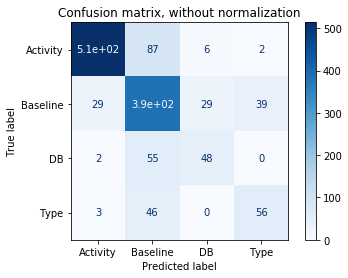

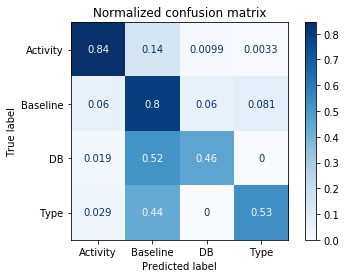

In [256]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

### Evaluate Accuracy & F1 Score

In [257]:
scores = pd.DataFrame([accuracy_score(y_test, y_pred),f1_score(y_test, y_pred,average='weighted')], columns = ['Score'], index = ['Accuracy', 'F1'])

In [258]:
scores

,Score
Accuracy,0.771121
F1,0.772429


### Feature Importances 

In [259]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(str(f+1)+ ". "+train.columns[f] + " (Importance: " + str(importances[indices[f]])+")")



Feature ranking:
1. ACC1_mean (Importance: 0.20550484519703827)
2. ACC2_mean (Importance: 0.12747183754962288)
3. ACC3_mean (Importance: 0.12384889616415799)
4. TEMP_mean (Importance: 0.07522596006803273)
5. EDA_mean (Importance: 0.07512529991042276)
6. BVP_mean (Importance: 0.0727330628757901)
7. HR_mean (Importance: 0.05643130416713463)
8. Magnitude_mean (Importance: 0.04743892359651158)
9. ACC1_std (Importance: 0.03744979636835443)
10. ACC2_std (Importance: 0.03604837838624102)
11. ACC3_std (Importance: 0.030400141662178384)
12. TEMP_std (Importance: 0.028980490402041037)
13. EDA_std (Importance: 0.022846577616114857)
14. BVP_std (Importance: 0.022320577961335856)
15. HR_std (Importance: 0.01981676819744238)
16. Magnitude_std (Importance: 0.01835713987758123)


In [260]:
train.columns[:-1]

Index(['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'TEMP_mean', 'EDA_mean',
       'BVP_mean', 'HR_mean', 'Magnitude_mean', 'ACC1_std', 'ACC2_std',
       'ACC3_std', 'TEMP_std', 'EDA_std', 'BVP_std', 'HR_std',
       'Magnitude_std'],
      dtype='object')

In [261]:
importances = pd.DataFrame(list(zip(train.columns[:-1],clf.feature_importances_)) , columns = ['Feature', 'Importance']) 

In [262]:
importances.sort_values(by='Importance', ascending = False).head()

,Feature,Importance
2,ACC3_mean,0.205505
15,Magnitude_std,0.127472
1,ACC2_mean,0.123849
9,ACC2_std,0.075226
0,ACC1_mean,0.075125


## LOOCV

__Leave One Out CV:__
Each observation is considered as a validation set and the rest n-1 observations are a training set. Fit the model and predict using 1 observation validation set. Repeat this for n times for each observation as a validation set.
Test-error rate is average of all n errors.

__Advantages:__ takes care of both drawbacks of validation-set method
1. No randomness of using some observations for training vs. validation set like in validation-set method as each observation is considered for both training a›nd validation. So overall less variability than Validation-set method due to no randomness no matter how many times you run it.
2. Less bias than validation-set method as training-set is of n-1 size. Because of this reduced bias, reduced over-estimation of test-error, not as much compared to validation-set method.

__Disadvantages:__
1. Even though each iterations test-error is un-biased, it has a high variability as only one-observation validation-set was used for prediction.
2. Computationally expensive (time and power) especially if dataset is big with large n as it requires fitting the model n times. Also some statistical models have computationally intensive fitting so with large dataset and these models LOOCV might not be a good choice.

### Initialize Loop Iterator & Lists

In [263]:
subject_ids = list(df.Subject_ID.unique())

In [264]:
LOOCV_accuracy = []
LOOCV_f1 = []
y_preds = []
y_tests = []

### Cross-Validation Algorithm

In [265]:
for subject in subject_ids:
    
    #Split into test and train based on subject
    test = df.loc[df['Subject_ID']==subject]
    train = df.loc[df['Subject_ID']!=subject]
    
    #Feature selection

    train = train[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 
        'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std','Activity']]
    test = test[['ACC1_mean', 'ACC2_mean', 'ACC3_mean', 'TEMP_mean', 'EDA_mean', 'BVP_mean', 'HR_mean', 
        'Magnitude_mean', 'ACC1_std', 'ACC2_std', 'ACC3_std', 'TEMP_std',
       'EDA_std', 'BVP_std', 'HR_std', 'Magnitude_std', 'Activity']]
    
    #Test-train split
    X_train = train.iloc[:, :-1].values
    y_train = train.iloc[:, -1].values
    X_test = test.iloc[:, :-1].values
    y_test = test.iloc[:, -1].values
    
    #Standardize data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Random Forest model
    clf = RandomForestClassifier(n_estimators=750,
    random_state=1337,
    max_depth=25,
    min_samples_leaf=1, class_weight='balanced_subsample' )
    
    #Fit and Predict using RF model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_preds.append(y_pred)
    y_tests.append(y_test)
    #Print Accuracy Score
    print('Completed LOOCV for Subject '+ subject)
    
    #Add to Lists
    LOOCV_accuracy.append(accuracy_score(y_test, y_pred))
    LOOCV_f1.append(f1_score(y_test, y_pred,average='weighted'))
    
    
    

Completed LOOCV for Subject 19-001
Completed LOOCV for Subject 19-002
Completed LOOCV for Subject 19-003
Completed LOOCV for Subject 19-004
Completed LOOCV for Subject 19-005
Completed LOOCV for Subject 19-006
Completed LOOCV for Subject 19-007
Completed LOOCV for Subject 19-008
Completed LOOCV for Subject 19-009
Completed LOOCV for Subject 19-010
Completed LOOCV for Subject 19-011
Completed LOOCV for Subject 19-012
Completed LOOCV for Subject 19-013
Completed LOOCV for Subject 19-014
Completed LOOCV for Subject 19-015
Completed LOOCV for Subject 19-016
Completed LOOCV for Subject 19-017
Completed LOOCV for Subject 19-018
Completed LOOCV for Subject 19-019
Completed LOOCV for Subject 19-020
Completed LOOCV for Subject 19-021
Completed LOOCV for Subject 19-022
Completed LOOCV for Subject 19-023
Completed LOOCV for Subject 19-024
Completed LOOCV for Subject 19-025
Completed LOOCV for Subject 19-026
Completed LOOCV for Subject 19-027
Completed LOOCV for Subject 19-029
Completed LOOCV for 

### LOOCV Confusion Matrix

In [266]:
y_tests = np.concatenate(y_tests, axis=0)
np.shape(y_tests)

(6572,)

In [267]:
y_preds = np.concatenate(y_preds, axis = 0)
np.shape(y_preds)

(6572,)

In [268]:
cm = confusion_matrix(y_tests,y_preds)
cm

array([[2725,  313,   13,   23],
       [ 104, 2052,  177,  105],
       [   2,  321,  204,    3],
       [  21,  225,    1,  283]])

In [269]:
cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
cm

array([[0.89, 0.1 , 0.  , 0.01],
       [0.04, 0.84, 0.07, 0.04],
       [0.  , 0.61, 0.38, 0.01],
       [0.04, 0.42, 0.  , 0.53]])

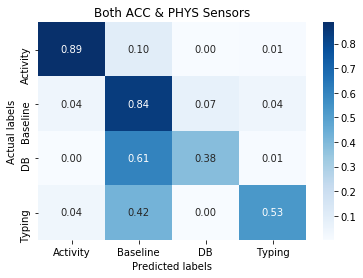

In [270]:
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = '.2f',cmap = 'Blues', xticklabels = ['Activity', 'Baseline', 'DB', 'Typing'], yticklabels = ['Activity', 'Baseline', 'DB', 'Typing'])
ax.set_xlabel("Predicted labels")
ax.set_ylabel('Actual labels')
plt.title('Both ACC & PHYS Sensors')
plt.savefig('conf_matrix_both.png')

### Create Dataframes to show Error Metrics

In [271]:
loocv_df = pd.DataFrame(columns = ['Accuracy Score', 'F1 Score'])

In [272]:
loocv_df['Accuracy Score'] = LOOCV_accuracy 
loocv_df['F1 Score'] = LOOCV_f1

In [273]:
loocv_df.index = subject_ids

In [274]:
loocv_df.sort_values(by='F1 Score', ascending = True).head()

,Accuracy Score,F1 Score
19-040,0.459677,0.400789
19-051,0.435484,0.442273
19-036,0.491935,0.469842
19-005,0.532258,0.493466
19-015,0.572581,0.559955


## Results

In [275]:
results = loocv_df.describe()
results.loc[['mean','std']]

,Accuracy Score,F1 Score
mean,0.802639,0.786593
std,0.126543,0.128433


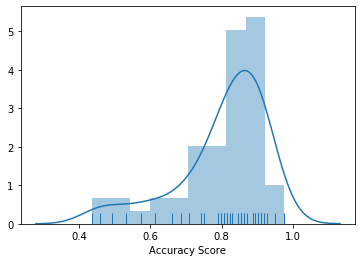

In [276]:
sns.distplot(loocv_df['Accuracy Score'], rug=True, bins=10)

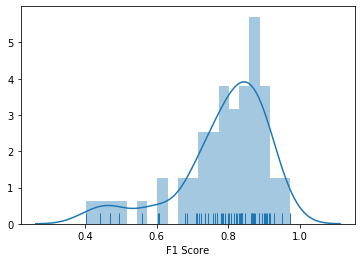

In [277]:
sns.distplot(loocv_df['F1 Score'], rug=True,bins=20)